# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 4: Modelos alternativos

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import re
from sklearn.svm import SVC
import pickle
import joblib
import time

In [ ]:
#Define el path de los archivos necesarios
model_path = '../models/svc_model.pkl'
X_path = '../data/processed/DTCPep_pca_pfeatures.csv'
y_path = '../data/processed/DTCPep_y.csv'

In [ ]:

baseline_model = joblib.load(model_path)
baseline_model

SVC(C=10, gamma=0.01, random_state=4)

In [ ]:
X = pd.read_csv(X_path)
y = pd.read_csv(y_path)

# Separar datasets en train y test
Como primer paso separamos el dataset en entrenamiento (80%), prueba (16%) y validación (4%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state =4, stratify=y_train)

In [ ]:
baseline_model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], shape=(5177,))

In [ ]:
# MODELS BUILDING AND PERFORMANCE EVALUATION

# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
# Import required libraries for machine learning classifiers
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifierCV
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import loguniform

In [ ]:
# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score),
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score),
           'f1_score':make_scorer(f1_score)}

In [ ]:
# Instantiate the machine learning classifiers
pac_model = PassiveAggressiveClassifier(n_jobs = -1, random_state= 4)
svc_model = LinearSVC(dual=False, random_state=4)
dtr_model = DecisionTreeClassifier(random_state=4)
rfc_model = RandomForestClassifier(n_jobs = -1, random_state= 4)
gnb_model = GaussianNB()
adaboost_model = AdaBoostClassifier(random_state=4)
ridge_model = RidgeClassifierCV()

Se compararán los siguientes modelos con el modelo base trabajado en la actividad anterior:
- Passive Aggressive Classifier
- Linear SCV
- Decision Tree Classifier
- Random Forest Classifier
- Gaussian Naive Bayes
- AdaBoost
- Ridge CV

In [ ]:
# Define the models evaluation function
def models_evaluation(baseline, X, y, folds):

    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds

    '''

    # Perform cross-validation to each machine learning classifier
    baseline = cross_validate(baseline, X, y, cv=folds, scoring=scoring)
    pac = cross_validate(pac_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    adaboost = cross_validate(adaboost_model, X, y, cv=folds, scoring=scoring)
    ridge = cross_validate(ridge_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce measures scores
    models_scores_table = pd.DataFrame({'Base Model':[baseline['test_accuracy'].mean(),
                                                               baseline['test_precision'].mean(),
                                                               baseline['test_recall'].mean(),
                                                               baseline['test_f1_score'].mean(),
                                                               baseline['fit_time'].mean()],

                                        'PasiveAgresiveClassifier':[pac['test_accuracy'].mean(),
                                                               pac['test_precision'].mean(),
                                                               pac['test_recall'].mean(),
                                                               pac['test_f1_score'].mean(),
                                                               pac['fit_time'].mean()],

                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean(),
                                                                   svc['fit_time'].mean()],

                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean(),
                                                       dtr['fit_time'].mean()],

                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean(),
                                                       rfc['fit_time'].mean()],

                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean(),
                                                              gnb['fit_time'].mean()],

                                       'AdaBoost':[adaboost['test_accuracy'].mean(),
                                                              adaboost['test_precision'].mean(),
                                                              adaboost['test_recall'].mean(),
                                                              adaboost['test_f1_score'].mean(),
                                                              adaboost['fit_time'].mean()],

                                        'RidgeCV':[ridge['test_accuracy'].mean(),
                                                              ridge['test_precision'].mean(),
                                                              ridge['test_recall'].mean(),
                                                              ridge['test_f1_score'].mean(),
                                                              ridge['fit_time'].mean()]},

                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Fit Time'])

    # Add 'Best Score' column
    best_score = models_scores_table.apply(lambda row: row.idxmin() if row.name == 'Fit Time' else row.idxmax(), axis=1)
    models_scores_table['Best Score'] = best_score

    # Return models performance metrics scores data frame
    return(models_scores_table)

Cada uno de los modelos se analizará en primera instancia con una validación cruzada con 5 subconjuntos para cada modelo, con el objetivo de tener modelos más robustos y confiables, evitando el sobre entrenamiento.

In [ ]:
# Run models_evaluation function
models_score = models_evaluation(baseline_model,X_train,y_train,5)
models_score

c:\Users\drjla\OneDrive\Desktop\MNA\proyecto\Advanced_drug_discovery\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\drjla\OneDrive\Desktop\MNA\proyecto\Advanced_drug_discovery\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\drjla\OneDrive\Desktop\MNA\proyecto\Advanced_drug_discovery\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\drjla\OneDrive\Desktop\MNA\proyecto\Advance

,Base Model,PasiveAgresiveClassifier,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,AdaBoost,RidgeCV,Best Score
Accuracy,0.811033,0.625153,0.709518,0.729606,0.805778,0.682477,0.715391,0.711835,Base Model
Precision,0.751370,0.413889,0.604728,0.582711,0.789030,0.511862,0.590797,0.619789,Random Forest
Recall,0.625393,0.455881,0.303666,0.587339,0.548292,0.484545,0.399802,0.291768,Base Model
F1 Score,0.682235,0.425317,0.403764,0.584955,0.646654,0.497272,0.475419,0.395989,Base Model
Fit Time,3.554347,0.018745,0.042594,0.370864,2.075885,0.014017,1.674572,0.023428,Gaussian Naive Bayes


# Grid Search tunning

## Random forest

In [ ]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")


In [ ]:
# Definir el diccionario de hiperparámetros
rf_params = dict( max_depth = np.linspace(10, 50, num=1).astype(int),
              n_estimators = np.linspace(100, 200, num=5).astype(int),
              criterion = ['entropy', 'log_loss'],
              max_features = ['sqrt', 'log2'],
              class_weight = ['balanced', 'balanced_subsample']

)

# Configurar RandomizedSearchCV
n_iter_search = 15
rfc_random_search = RandomizedSearchCV(
    rfc_model, param_distributions=rf_params, n_iter=n_iter_search, n_jobs= -1, verbose=3, scoring = scoring, refit = 'precision'
)

# Ajustar el modelo
start_time = time.time()
rfc_random_search.fit(X_train,y_train)
end_time = time.time()
rfc_fit_time = end_time - start_time

print(f"Tiempo de ajuste del modelo: {rfc_fit_time} segundos")

Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\drjla\OneDrive\Desktop\MNA\proyecto\Advanced_drug_discovery\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Tiempo de ajuste del modelo: 334.4266941547394 segundos


In [ ]:
# Mejor estimador encontrado
rfc_random_search.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=np.int64(10), max_features='log2',
                       n_estimators=np.int64(100), n_jobs=-1, random_state=4)

In [ ]:
rfc_random_search.scorer_

{'accuracy': make_scorer(accuracy_score, response_method='predict'),
 'precision': make_scorer(precision_score, response_method='predict'),
 'recall': make_scorer(recall_score, response_method='predict'),
 'f1_score': make_scorer(f1_score, response_method='predict')}

In [ ]:
# Predice valores de y
y_predict_rfc_train = rfc_random_search.predict(X_train)
y_predict_rfc_val = rfc_random_search.predict(X_val)
y_predict_rfc_test = rfc_random_search.predict(X_test)

# Calcula la precisión
accuracy_rfc_train = accuracy_score(y_train,y_predict_rfc_train)
accuracy_rfc_val = accuracy_score(y_val,y_predict_rfc_val)
accuracy_rfc_test = accuracy_score(y_test,y_predict_rfc_test)

print(f'Accuracy train {accuracy_rfc_train}')
print(f'Accuracy val {accuracy_rfc_val}')
print(f'Accuracy test {accuracy_rfc_test}')


Accuracy train 0.8601668726823238
Accuracy val 0.8532818532818532
Accuracy test 0.8618891249758548


In [ ]:
# Scores
print(classification_report(y_train, y_predict_rfc_train, target_names=['positive','negative']))
print(classification_report(y_val, y_predict_rfc_val, target_names=['positive','negative']))
print(classification_report(y_test, y_predict_rfc_test, target_names=['positive','negative']))

              precision    recall  f1-score   support

    positive       0.93      0.85      0.89      4371
    negative       0.74      0.87      0.80      2101

    accuracy                           0.86      6472
   macro avg       0.84      0.86      0.85      6472
weighted avg       0.87      0.86      0.86      6472

              precision    recall  f1-score   support

    positive       0.93      0.85      0.89       875
    negative       0.73      0.87      0.79       420

    accuracy                           0.85      1295
   macro avg       0.83      0.86      0.84      1295
weighted avg       0.87      0.85      0.86      1295

              precision    recall  f1-score   support

    positive       0.93      0.86      0.89      3496
    negative       0.74      0.87      0.80      1681

    accuracy                           0.86      5177
   macro avg       0.84      0.87      0.85      5177
weighted avg       0.87      0.86      0.86      5177



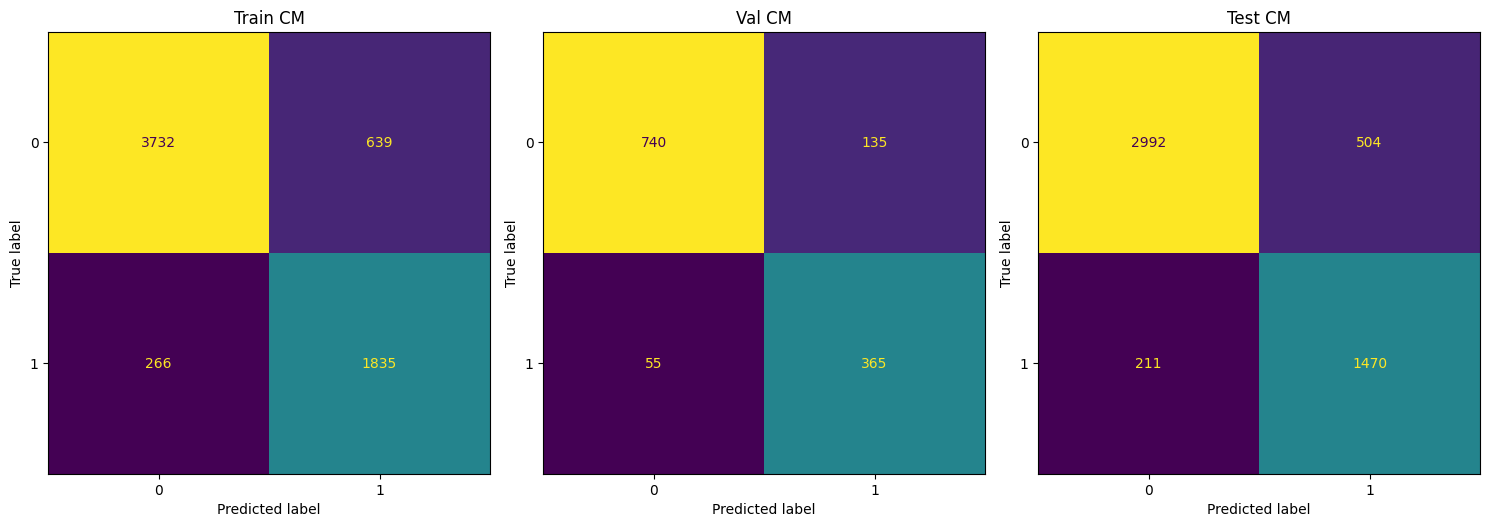

In [ ]:
# Crear figuras y ejes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Matriz de confusión para el conjunto de entrenamiento
cm_rf_train = confusion_matrix(y_train, y_predict_rfc_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_train)
disp.plot(ax=axes[0], colorbar=False)
axes[0].set_title('Train CM')

# Matriz de confusión para el conjunto de validación
cm_rf_val = confusion_matrix(y_val, y_predict_rfc_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_val)
disp.plot(ax=axes[1], colorbar=False)
axes[1].set_title('Val CM')

# Matriz de confusión para el conjunto de prueba
cm_rf_test = confusion_matrix(y_test, y_predict_rfc_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_test)
disp.plot(ax=axes[2], colorbar=False)
axes[2].set_title('Test CM')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()


In [ ]:
rfc_random_search

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=4),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['entropy', 'log_loss'],
                                        'max_depth': array([10]),
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': array([100, 125, 150, 175, 200])},
                   refit='precision',
                   scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                            'f1_score': make_scorer(f1_score, response_method='predict'),
                            'precision': make_scorer(precision_score, response_method='predict'),
                            'recall': make_scorer(recall_score, response_method='predict')},
                   verbose=3)

In [ ]:
with open("../models/rf_model.pkl", "wb") as f:
    pickle.dump(rfc_random_search.best_estimator_, f)
print("Random Forest Model saved")

Random Forest Model saved


## Decision Tree

In [ ]:
# Definir el diccionario de hiperparámetros
dtr_params = dict(
    max_depth=np.linspace(10, 50, num=5).astype(int),   # Profundidad máxima del árbol
    criterion=['gini', 'entropy'],                     # Criterio para medir la calidad de una división
    splitter=['best', 'random'],                       # Estrategia utilizada para elegir la división en cada nodo
    min_samples_split=[2, 5, 10],                      # Número mínimo de muestras requeridas para dividir un nodo interno
    min_samples_leaf=[1, 2, 4])

# Configurar RandomizedSearchCV
n_iter_search = 15
dtr_random_search = RandomizedSearchCV(
    dtr_model,
    param_distributions=dtr_params,
    n_iter=n_iter_search,
    n_jobs= -1,
    verbose=3,
    scoring = scoring,
    refit = 'precision')

# Ajustar el modelo
start_time = time.time()
dtr_random_search.fit(X_train,y_train)
end_time = time.time()
dtr_fit_time = end_time - start_time

print(f"Tiempo de ajuste del modelo: {dtr_fit_time} segundos")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Tiempo de ajuste del modelo: 21.389004230499268 segundos


In [ ]:
# Mejor estimador encontrado
dtr_random_search.best_estimator_

DecisionTreeClassifier(max_depth=np.int64(30), min_samples_leaf=4,
                       random_state=4, splitter='random')

In [ ]:
dtr_random_search.scorer_

{'accuracy': make_scorer(accuracy_score, response_method='predict'),
 'precision': make_scorer(precision_score, response_method='predict'),
 'recall': make_scorer(recall_score, response_method='predict'),
 'f1_score': make_scorer(f1_score, response_method='predict')}

In [ ]:
# Predice valores de y
y_predict_dtr_train = dtr_random_search.predict(X_train)
y_predict_dtr_val = dtr_random_search.predict(X_val)
y_predict_dtr_test = dtr_random_search.predict(X_test)

# Calcula la precisión
accuracy_dtr_train = accuracy_score(y_train,y_predict_dtr_train)
accuracy_dtr_val = accuracy_score(y_val,y_predict_dtr_val)
accuracy_dtr_test = accuracy_score(y_test,y_predict_dtr_test)

print(f'Accuracy train {accuracy_dtr_train}')
print(f'Accuracy val {accuracy_dtr_val}')
print(f'Accuracy test {accuracy_dtr_test}')

Accuracy train 0.8819530284301607
Accuracy val 0.8872586872586873
Accuracy test 0.8806258450840255


In [ ]:
# Scores
print(classification_report(y_train, y_predict_dtr_train, target_names=['positive','negative']))
print(classification_report(y_val, y_predict_dtr_val, target_names=['positive','negative']))
print(classification_report(y_test, y_predict_dtr_test, target_names=['positive','negative']))

              precision    recall  f1-score   support

    positive       0.89      0.94      0.92      4371
    negative       0.87      0.75      0.81      2101

    accuracy                           0.88      6472
   macro avg       0.88      0.85      0.86      6472
weighted avg       0.88      0.88      0.88      6472

              precision    recall  f1-score   support

    positive       0.89      0.95      0.92       875
    negative       0.88      0.76      0.81       420

    accuracy                           0.89      1295
   macro avg       0.88      0.85      0.87      1295
weighted avg       0.89      0.89      0.88      1295

              precision    recall  f1-score   support

    positive       0.89      0.94      0.91      3496
    negative       0.86      0.75      0.80      1681

    accuracy                           0.88      5177
   macro avg       0.88      0.85      0.86      5177
weighted avg       0.88      0.88      0.88      5177



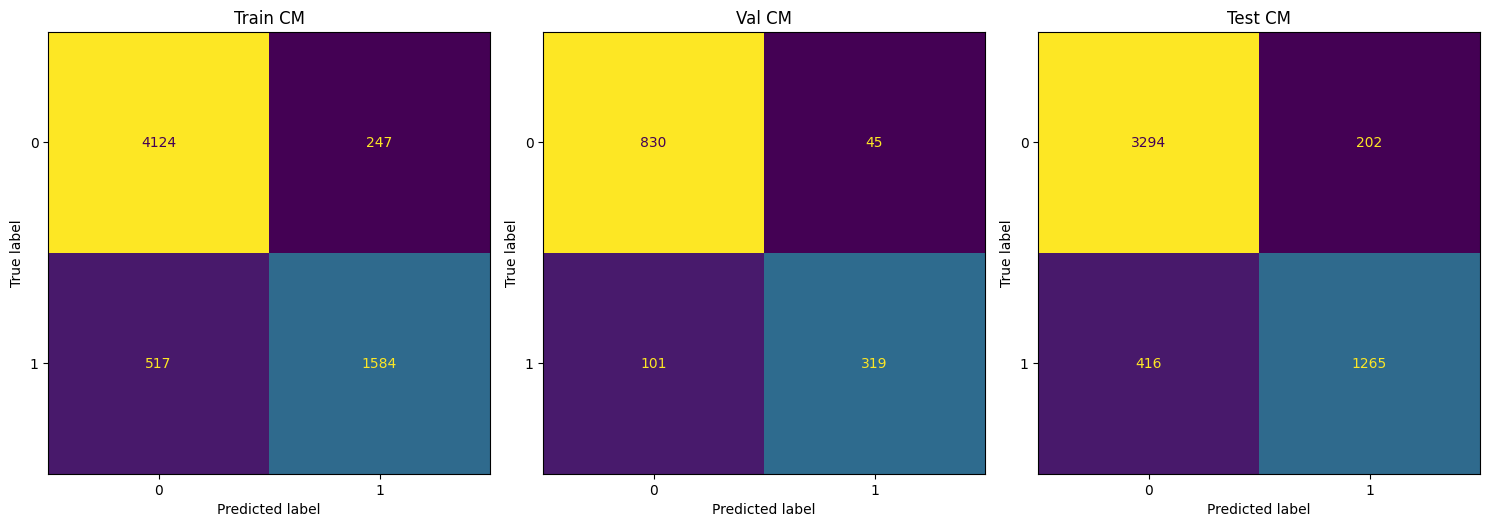

In [ ]:
# Crear figuras y ejes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Matriz de confusión para el conjunto de entrenamiento
cm_dtr_train = confusion_matrix(y_train, y_predict_dtr_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtr_train)
disp.plot(ax=axes[0], colorbar=False)
axes[0].set_title('Train CM')

# Matriz de confusión para el conjunto de validación
cm_dtr_val = confusion_matrix(y_val, y_predict_dtr_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtr_val)
disp.plot(ax=axes[1], colorbar=False)
axes[1].set_title('Val CM')

# Matriz de confusión para el conjunto de prueba
cm_dtr_test = confusion_matrix(y_test, y_predict_dtr_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtr_test)
disp.plot(ax=axes[2], colorbar=False)
axes[2].set_title('Test CM')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

In [ ]:
with open("../models/dtr_model.pkl", "wb") as f:
    pickle.dump(dtr_random_search.best_estimator_, f)
print("Decision Tree Model saved")

Decision Tree Model saved


## Linear Support Vector Classifier

In [ ]:
# Definir el diccionario de hiperparámetros
# La salida arroja observaciones debido a que algunas combinaciones de los hiperparámetros no son válidas.
linear_svc_params = dict(
    C=[0.1, 1, 10, 100],              # Parámetro de regularización
    penalty=['l1', 'l2'],              # Tipo de penalización (solo 'l2' está soportado por defecto)
    loss=['hinge', 'squared_hinge'],   # Función de pérdida
    dual=[False, True],                # Estrategia de resolución dual o primal
    max_iter=[1000, 2000, 3000]        # Número máximo de iteraciones
)

# Configurar RandomizedSearchCV
n_iter_search = 15
svc_random_search = RandomizedSearchCV(
    svc_model,
    param_distributions=linear_svc_params,
    n_iter=n_iter_search,
    n_jobs=-1,
    verbose=3,
    scoring=scoring,
    refit='precision'
)

# Ajustar el modelo
start_time = time.time()
svc_random_search.fit(X_train, y_train)
end_time = time.time()
svc_fit_time = end_time - start_time

print(f"Tiempo de ajuste del modelo: {svc_fit_time} segundos")

Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\drjla\OneDrive\Desktop\MNA\proyecto\Advanced_drug_discovery\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\drjla\OneDrive\Desktop\MNA\proyecto\Advanced_drug_discovery\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\drjla\OneDrive\Desktop\MNA\proyecto\Advanced_drug_discovery\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^

Tiempo de ajuste del modelo: 31.885892868041992 segundos


c:\Users\drjla\OneDrive\Desktop\MNA\proyecto\Advanced_drug_discovery\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Mejor estimador encontrado
svc_random_search.best_estimator_

LinearSVC(C=1, dual=False, random_state=4)

In [ ]:
svc_random_search.scorer_

{'accuracy': make_scorer(accuracy_score, response_method='predict'),
 'precision': make_scorer(precision_score, response_method='predict'),
 'recall': make_scorer(recall_score, response_method='predict'),
 'f1_score': make_scorer(f1_score, response_method='predict')}

In [ ]:
# Predice valores de y
y_predict_svc_train = svc_random_search.predict(X_train)
y_predict_svc_val = svc_random_search.predict(X_val)
y_predict_svc_test = svc_random_search.predict(X_test)

# Calcula la precisión:
accuracy_svc_train = accuracy_score(y_train,y_predict_svc_train)
accuracy_svc_val = accuracy_score(y_val,y_predict_svc_val)
accuracy_svc_test = accuracy_score(y_test,y_predict_svc_test)

print(f'Accuracy train {accuracy_svc_train}')
print(f'Accuracy val {accuracy_svc_val}')
print(f'Accuracy test {accuracy_svc_test}')


Accuracy train 0.7124536464771323
Accuracy val 0.7142857142857143
Accuracy test 0.7119953641104887


In [ ]:
# Scores
print(classification_report(y_train, y_predict_svc_train, target_names=['positive','negative']))
print(classification_report(y_val, y_predict_svc_val, target_names=['positive','negative']))
print(classification_report(y_test, y_predict_svc_test, target_names=['positive','negative']))

              precision    recall  f1-score   support

    positive       0.73      0.91      0.81      4371
    negative       0.61      0.31      0.41      2101

    accuracy                           0.71      6472
   macro avg       0.67      0.61      0.61      6472
weighted avg       0.69      0.71      0.68      6472

              precision    recall  f1-score   support

    positive       0.73      0.90      0.81       875
    negative       0.61      0.32      0.42       420

    accuracy                           0.71      1295
   macro avg       0.67      0.61      0.62      1295
weighted avg       0.70      0.71      0.68      1295

              precision    recall  f1-score   support

    positive       0.73      0.91      0.81      3496
    negative       0.61      0.31      0.41      1681

    accuracy                           0.71      5177
   macro avg       0.67      0.61      0.61      5177
weighted avg       0.69      0.71      0.68      5177



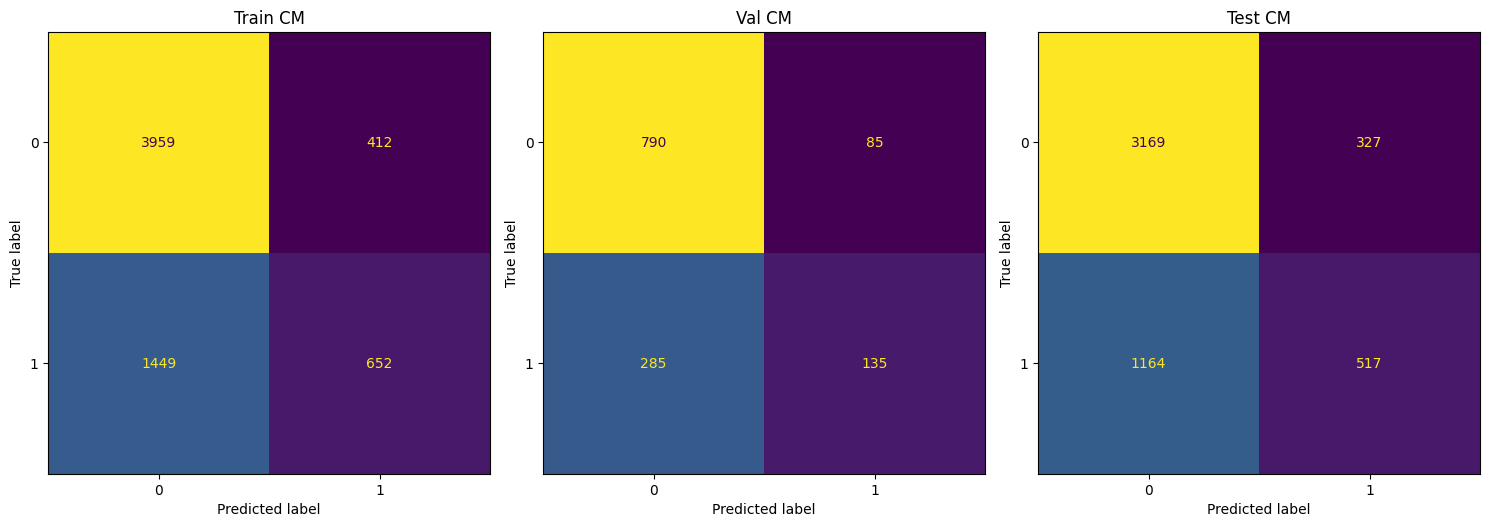

In [ ]:
# Crear figuras y ejes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Matriz de confusión para el conjunto de entrenamiento
cm_svc_train = confusion_matrix(y_train, y_predict_svc_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc_train)
disp.plot(ax=axes[0], colorbar=False)
axes[0].set_title('Train CM')

# Matriz de confusión para el conjunto de validación
cm_svc_val = confusion_matrix(y_val, y_predict_svc_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc_val)
disp.plot(ax=axes[1], colorbar=False)
axes[1].set_title('Val CM')

# Matriz de confusión para el conjunto de prueba
cm_svc_test = confusion_matrix(y_test, y_predict_svc_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc_test)
disp.plot(ax=axes[2], colorbar=False)
axes[2].set_title('Test CM')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

In [ ]:
with open("../models/lsvc_model.pkl", "wb") as f:
    pickle.dump(svc_random_search.best_estimator_, f)
print("Linear Support Vector Classifier Model saved")

Linear Support Vector Classifier Model saved


## Pasive Agresive Classifier

In [ ]:
# Definir el diccionario de hiperparámetros
pac_params = dict(
    C=[0.1, 1, 10, 100],                     # Parámetro de regularización
    max_iter=[1000, 2000, 3000],              # Número máximo de iteraciones
    tol=[1e-3, 1e-4, 1e-5],                   # Tolerancia para la optimización
    loss=['hinge', 'squared_hinge'],          # Función de pérdida
    early_stopping=[True, False],             # Si se usa o no el parón temprano
    validation_fraction=[0.1, 0.2, 0.3],      # Fracción de datos usados para la validación cuando se usa el parón temprano
    n_iter_no_change=[5, 10, 15]              # Número de iteraciones con ninguna mejora para el parón temprano
)

# Configurar RandomizedSearchCV
n_iter_search = 15
pac_random_search = RandomizedSearchCV(
    pac_model,
    param_distributions=pac_params,
    n_iter=n_iter_search,
    n_jobs=-1,
    verbose=3,
    scoring=scoring,
    refit='precision'
)

# Ajustar el modelo
start_time = time.time()
pac_random_search.fit(X_train, y_train)
end_time = time.time()
pac_fit_time = end_time - start_time

print(f"Tiempo de ajuste del modelo: {pac_fit_time} segundos")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Tiempo de ajuste del modelo: 6.192972660064697 segundos


c:\Users\drjla\OneDrive\Desktop\MNA\proyecto\Advanced_drug_discovery\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Mejor estimador encontrado
pac_random_search.best_estimator_

PassiveAggressiveClassifier(C=0.1, loss='squared_hinge', max_iter=2000,
                            n_iter_no_change=15, n_jobs=-1, random_state=4,
                            tol=1e-05, validation_fraction=0.3)

In [ ]:
pac_random_search.scorer_

{'accuracy': make_scorer(accuracy_score, response_method='predict'),
 'precision': make_scorer(precision_score, response_method='predict'),
 'recall': make_scorer(recall_score, response_method='predict'),
 'f1_score': make_scorer(f1_score, response_method='predict')}

In [ ]:
# Predice valores de y
y_predict_pac_train = pac_random_search.predict(X_train)
y_predict_pac_val = pac_random_search.predict(X_val)
y_predict_pac_test = pac_random_search.predict(X_test)

# Calcula la precisión:
accuracy_pac_train = accuracy_score(y_train,y_predict_pac_train)
accuracy_pac_val = accuracy_score(y_val,y_predict_pac_val)
accuracy_pac_test = accuracy_score(y_test,y_predict_pac_test)

print(f'Accuracy train {accuracy_pac_train}')
print(f'Accuracy val {accuracy_pac_val}')
print(f'Accuracy test {accuracy_pac_test}')

Accuracy train 0.655902348578492
Accuracy val 0.6424710424710425
Accuracy test 0.6592621209194515


In [ ]:
# Scores
print(classification_report(y_train, y_predict_pac_train, target_names=['positive','negative']))
print(classification_report(y_val, y_predict_pac_val, target_names=['positive','negative']))
print(classification_report(y_test, y_predict_pac_test, target_names=['positive','negative']))

              precision    recall  f1-score   support

    positive       0.74      0.76      0.75      4371
    negative       0.47      0.44      0.45      2101

    accuracy                           0.66      6472
   macro avg       0.60      0.60      0.60      6472
weighted avg       0.65      0.66      0.65      6472

              precision    recall  f1-score   support

    positive       0.74      0.73      0.74       875
    negative       0.45      0.45      0.45       420

    accuracy                           0.64      1295
   macro avg       0.59      0.59      0.59      1295
weighted avg       0.64      0.64      0.64      1295

              precision    recall  f1-score   support

    positive       0.74      0.77      0.75      3496
    negative       0.47      0.44      0.45      1681

    accuracy                           0.66      5177
   macro avg       0.61      0.60      0.60      5177
weighted avg       0.65      0.66      0.66      5177



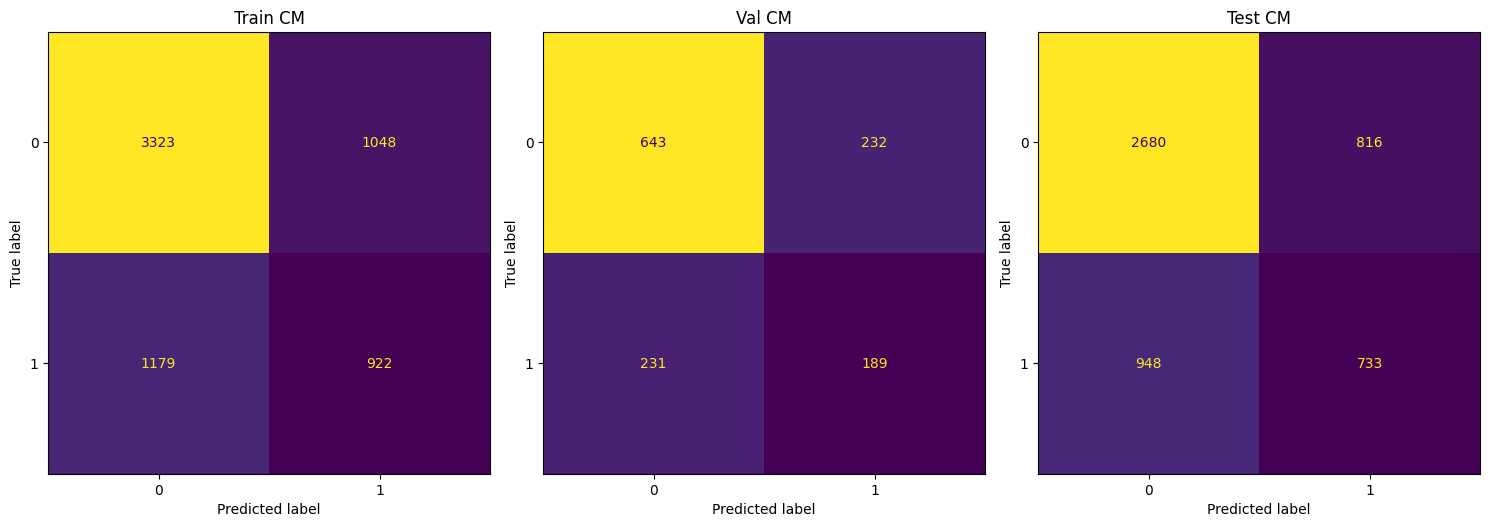

In [ ]:
# Crear figuras y ejes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Matriz de confusión para el conjunto de entrenamiento
cm_pac_train = confusion_matrix(y_train, y_predict_pac_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pac_train)
disp.plot(ax=axes[0], colorbar=False)
axes[0].set_title('Train CM')

# Matriz de confusión para el conjunto de validación
cm_pac_val = confusion_matrix(y_val, y_predict_pac_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pac_val)
disp.plot(ax=axes[1], colorbar=False)
axes[1].set_title('Val CM')

# Matriz de confusión para el conjunto de prueba
cm_pac_test = confusion_matrix(y_test, y_predict_pac_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pac_test)
disp.plot(ax=axes[2], colorbar=False)
axes[2].set_title('Test CM')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

In [ ]:
with open("../models/pac_model.pkl", "wb") as f:
    pickle.dump(pac_random_search.best_estimator_, f)
print("Pasive Agresive Classifier Model saved")

Pasive Agresive Classifier Model saved


## Gaussian Naive Bayes

In [ ]:
# Definir el diccionario de hiperparámetros
gnb_params = dict(
    var_smoothing=np.logspace(0, -9, num=100)  # Espacio de búsqueda en escala logarítmica
)

# Configurar RandomizedSearchCV
n_iter_search = 15
gnb_random_search = RandomizedSearchCV(
    gnb_model,
    param_distributions=gnb_params,
    n_iter=n_iter_search,
    n_jobs=-1,
    verbose=3,
    scoring=scoring,
    refit='precision'
)

# Ajustar el modelo
start_time = time.time()
gnb_random_search.fit(X_train, y_train)
end_time = time.time()
gnb_fit_time = end_time - start_time

print(f"Tiempo de ajuste del modelo: {gnb_fit_time} segundos")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Tiempo de ajuste del modelo: 4.231185436248779 segundos


c:\Users\drjla\OneDrive\Desktop\MNA\proyecto\Advanced_drug_discovery\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Mejor estimador encontrado
gnb_random_search.best_estimator_

GaussianNB(var_smoothing=np.float64(0.23101297000831597))

In [ ]:
gnb_random_search.scorer_

{'accuracy': make_scorer(accuracy_score, response_method='predict'),
 'precision': make_scorer(precision_score, response_method='predict'),
 'recall': make_scorer(recall_score, response_method='predict'),
 'f1_score': make_scorer(f1_score, response_method='predict')}

In [ ]:
# Predice valores de y
y_predict_gnb_train = gnb_random_search.predict(X_train)
y_predict_gnb_val = gnb_random_search.predict(X_val)
y_predict_gnb_test = gnb_random_search.predict(X_test)

# Calcula la precisión:
accuracy_gnb_train = accuracy_score(y_train,y_predict_gnb_train)
accuracy_gnb_val = accuracy_score(y_val,y_predict_gnb_val)
accuracy_gnb_test = accuracy_score(y_test,y_predict_gnb_test)

print(f'Accuracy train {accuracy_gnb_train}')
print(f'Accuracy val {accuracy_gnb_val}')
print(f'Accuracy test {accuracy_gnb_test}')

Accuracy train 0.7070457354758962
Accuracy val 0.7088803088803088
Accuracy test 0.7065868263473054


In [ ]:
# Scores
print(classification_report(y_train, y_predict_gnb_train, target_names=['positive','negative']))
print(classification_report(y_val, y_predict_gnb_val, target_names=['positive','negative']))
print(classification_report(y_test, y_predict_gnb_test, target_names=['positive','negative']))

              precision    recall  f1-score   support

    positive       0.73      0.91      0.81      4371
    negative       0.60      0.29      0.40      2101

    accuracy                           0.71      6472
   macro avg       0.66      0.60      0.60      6472
weighted avg       0.69      0.71      0.67      6472

              precision    recall  f1-score   support

    positive       0.73      0.91      0.81       875
    negative       0.60      0.30      0.40       420

    accuracy                           0.71      1295
   macro avg       0.67      0.60      0.60      1295
weighted avg       0.69      0.71      0.67      1295

              precision    recall  f1-score   support

    positive       0.73      0.90      0.81      3496
    negative       0.60      0.29      0.39      1681

    accuracy                           0.71      5177
   macro avg       0.66      0.60      0.60      5177
weighted avg       0.69      0.71      0.67      5177



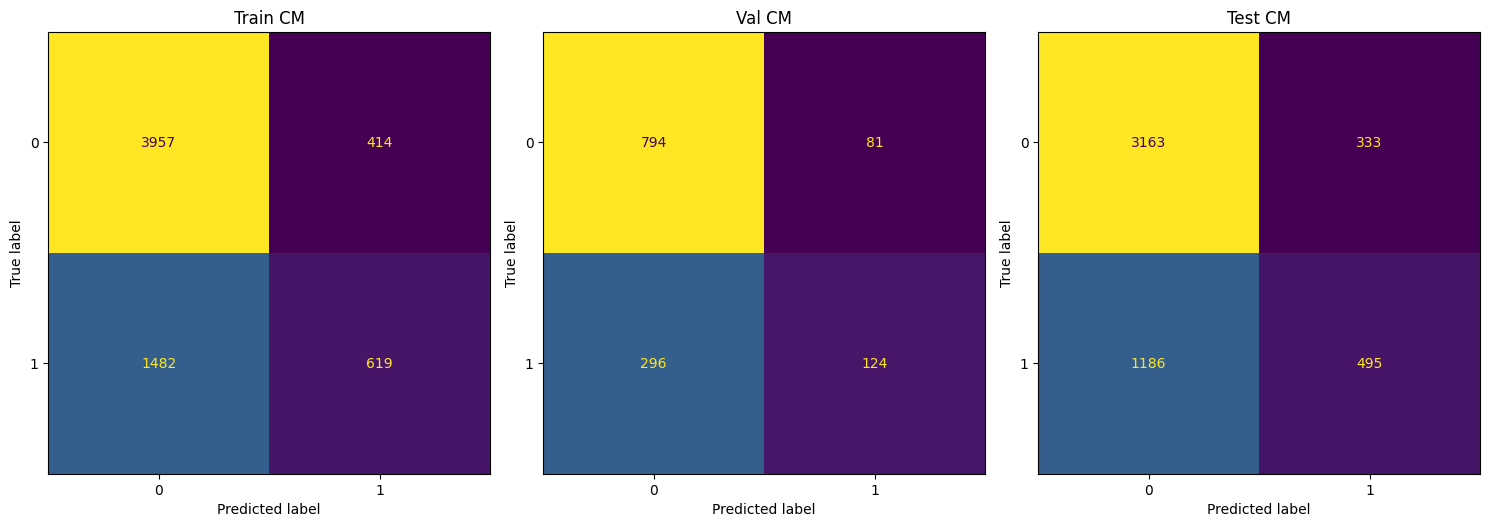

In [ ]:
# Crear figuras y ejes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Matriz de confusión para el conjunto de entrenamiento
cm_gnb_train = confusion_matrix(y_train, y_predict_gnb_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gnb_train)
disp.plot(ax=axes[0], colorbar=False)
axes[0].set_title('Train CM')

# Matriz de confusión para el conjunto de validación
cm_gnb_val = confusion_matrix(y_val, y_predict_gnb_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gnb_val)
disp.plot(ax=axes[1], colorbar=False)
axes[1].set_title('Val CM')

# Matriz de confusión para el conjunto de prueba
cm_gnb_test = confusion_matrix(y_test, y_predict_gnb_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gnb_test)
disp.plot(ax=axes[2], colorbar=False)
axes[2].set_title('Test CM')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

In [ ]:
with open("../models/gnb_model.pkl", "wb") as f:
    pickle.dump(gnb_random_search.best_estimator_, f)
print("Gaussian Naive Bayes Model saved")

Gaussian Naive Bayes Model saved


## AdaBoost

In [ ]:
# Definir el diccionario de hiperparámetros
ada_params = dict(
    n_estimators=[50, 100, 200, 300],                # Número de árboles base
    learning_rate=[0.01, 0.1, 1, 10],                # Tasa de aprendizaje
)

# Configurar RandomizedSearchCV
n_iter_search = 15
ada_random_search = RandomizedSearchCV(
    adaboost_model,
    param_distributions=ada_params,
    n_iter=n_iter_search,
    n_jobs=-1,
    verbose=3,
    scoring=scoring,
    refit='precision'
)

# Ajustar el modelo
start_time = time.time()
ada_random_search.fit(X_train, y_train)
end_time = time.time()
ada_fit_time = end_time - start_time

print(f"Tiempo de ajuste del modelo: {ada_fit_time} segundos")

Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\drjla\OneDrive\Desktop\MNA\proyecto\Advanced_drug_discovery\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tiempo de ajuste del modelo: 250.26929473876953 segundos


In [ ]:
# Mejor estimador encontrado
ada_random_search.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=4)

In [ ]:
ada_random_search.scorer_

{'accuracy': make_scorer(accuracy_score, response_method='predict'),
 'precision': make_scorer(precision_score, response_method='predict'),
 'recall': make_scorer(recall_score, response_method='predict'),
 'f1_score': make_scorer(f1_score, response_method='predict')}

In [ ]:
# Predice valores de y
y_predict_ada_train = ada_random_search.predict(X_train)
y_predict_ada_val = ada_random_search.predict(X_val)
y_predict_ada_test = ada_random_search.predict(X_test)

# Calcula la precisión:
accuracy_ada_train = accuracy_score(y_train,y_predict_ada_train)
accuracy_ada_val = accuracy_score(y_val,y_predict_ada_val)
accuracy_ada_test = accuracy_score(y_test,y_predict_ada_test)

print(f'Accuracy train {accuracy_ada_train}')
print(f'Accuracy val {accuracy_ada_val}')
print(f'Accuracy test {accuracy_ada_test}')

Accuracy train 0.7022558714462299
Accuracy val 0.7081081081081081
Accuracy test 0.7007919644581804


In [ ]:
# Scores
print(classification_report(y_train, y_predict_ada_train, target_names=['positive','negative']))
print(classification_report(y_val, y_predict_ada_val, target_names=['positive','negative']))
print(classification_report(y_test, y_predict_ada_test, target_names=['positive','negative']))

              precision    recall  f1-score   support

    positive       0.70      0.98      0.82      4371
    negative       0.74      0.13      0.22      2101

    accuracy                           0.70      6472
   macro avg       0.72      0.55      0.52      6472
weighted avg       0.71      0.70      0.62      6472

              precision    recall  f1-score   support

    positive       0.70      0.98      0.82       875
    negative       0.80      0.13      0.23       420

    accuracy                           0.71      1295
   macro avg       0.75      0.56      0.52      1295
weighted avg       0.73      0.71      0.63      1295

              precision    recall  f1-score   support

    positive       0.70      0.98      0.82      3496
    negative       0.73      0.13      0.21      1681

    accuracy                           0.70      5177
   macro avg       0.71      0.55      0.52      5177
weighted avg       0.71      0.70      0.62      5177



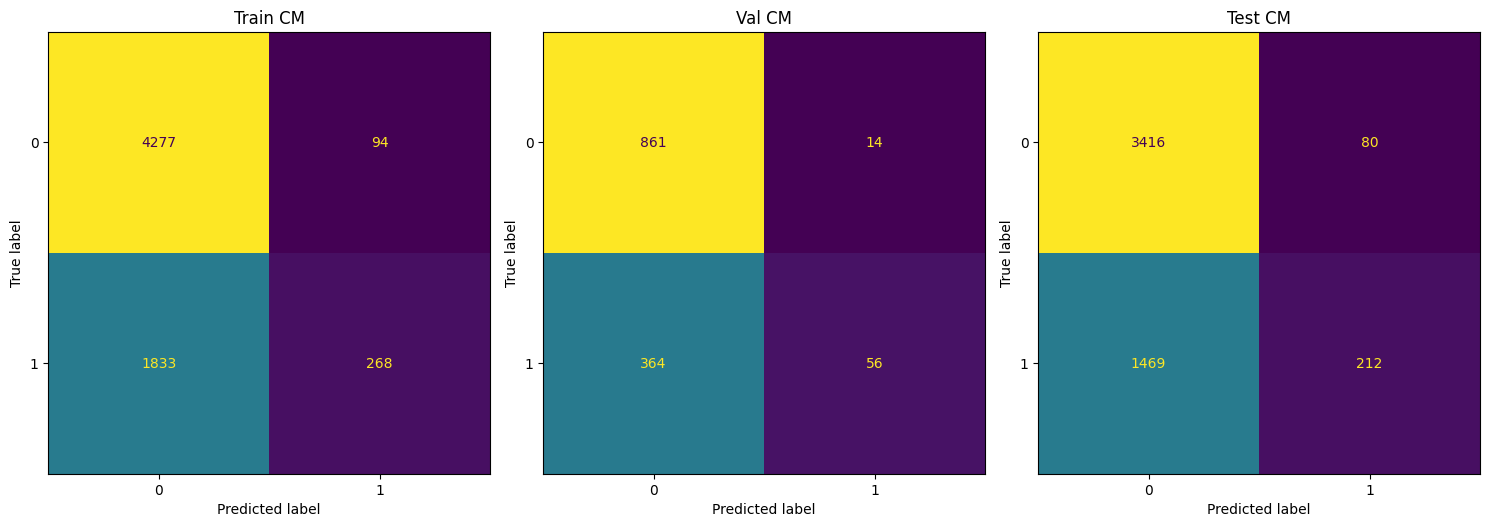

In [ ]:
# Crear figuras y ejes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Matriz de confusión para el conjunto de entrenamiento
cm_ada_train = confusion_matrix(y_train, y_predict_ada_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada_train)
disp.plot(ax=axes[0], colorbar=False)
axes[0].set_title('Train CM')

# Matriz de confusión para el conjunto de validación
cm_ada_val = confusion_matrix(y_val, y_predict_ada_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada_val)
disp.plot(ax=axes[1], colorbar=False)
axes[1].set_title('Val CM')

# Matriz de confusión para el conjunto de prueba
cm_ada_test = confusion_matrix(y_test, y_predict_ada_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada_test)
disp.plot(ax=axes[2], colorbar=False)
axes[2].set_title('Test CM')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

In [ ]:
with open("../models/ada_model.pkl", "wb") as f:
    pickle.dump(ada_random_search.best_estimator_, f)
print("AdaBoost Model saved")

AdaBoost Model saved


## Ridge CV Model

In [ ]:
# Definir el diccionario de hiperparámetros
ridge_params = dict(
    alphas=np.logspace(-6, 6, 13),      # Valores de alpha en una escala logarítmica
    fit_intercept=[True, False],       # Si se ajusta el intercepto
)

# Configurar RandomizedSearchCV
n_iter_search = 15
ridge_random_search = RandomizedSearchCV(
    ridge_model,
    param_distributions=ridge_params,
    n_iter=n_iter_search,
    n_jobs=-1,
    verbose=3,
    scoring=scoring,
    refit='precision'
)

# Ajustar el modelo
start_time = time.time()
ridge_random_search.fit(X_train, y_train)
end_time = time.time()
ridge_fit_time = end_time - start_time

print(f"Tiempo de ajuste del modelo: {ridge_fit_time} segundos")


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Tiempo de ajuste del modelo: 4.200669288635254 segundos


c:\Users\drjla\OneDrive\Desktop\MNA\proyecto\Advanced_drug_discovery\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:1307: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Mejor estimador encontrado
ridge_random_search.best_estimator_

RidgeClassifierCV(alphas=np.float64(0.0001))

In [ ]:
ridge_random_search.scorer_

{'accuracy': make_scorer(accuracy_score, response_method='predict'),
 'precision': make_scorer(precision_score, response_method='predict'),
 'recall': make_scorer(recall_score, response_method='predict'),
 'f1_score': make_scorer(f1_score, response_method='predict')}

In [ ]:
# Predice valores de y
y_predict_ridge_train = ridge_random_search.predict(X_train)
y_predict_ridge_val = ridge_random_search.predict(X_val)
y_predict_ridge_test = ridge_random_search.predict(X_test)

# Calcula la precisión:
accuracy_ridge_train = accuracy_score(y_train,y_predict_ridge_train)
accuracy_ridge_val = accuracy_score(y_val,y_predict_ridge_val)
accuracy_ridge_test = accuracy_score(y_test,y_predict_ridge_test)

print(f'Accuracy train {accuracy_ridge_train}')
print(f'Accuracy val {accuracy_ridge_val}')
print(f'Accuracy test {accuracy_ridge_test}')

Accuracy train 0.7124536464771323
Accuracy val 0.7158301158301158
Accuracy test 0.711609039984547


In [ ]:
# Scores
print(classification_report(y_train, y_predict_ridge_train, target_names=['positive','negative']))
print(classification_report(y_val, y_predict_ridge_val, target_names=['positive','negative']))
print(classification_report(y_test, y_predict_ridge_test, target_names=['positive','negative']))

              precision    recall  f1-score   support

    positive       0.73      0.91      0.81      4371
    negative       0.62      0.30      0.40      2101

    accuracy                           0.71      6472
   macro avg       0.67      0.60      0.61      6472
weighted avg       0.69      0.71      0.68      6472

              precision    recall  f1-score   support

    positive       0.73      0.91      0.81       875
    negative       0.63      0.31      0.41       420

    accuracy                           0.72      1295
   macro avg       0.68      0.61      0.61      1295
weighted avg       0.70      0.72      0.68      1295

              precision    recall  f1-score   support

    positive       0.73      0.91      0.81      3496
    negative       0.62      0.29      0.40      1681

    accuracy                           0.71      5177
   macro avg       0.67      0.60      0.60      5177
weighted avg       0.69      0.71      0.68      5177



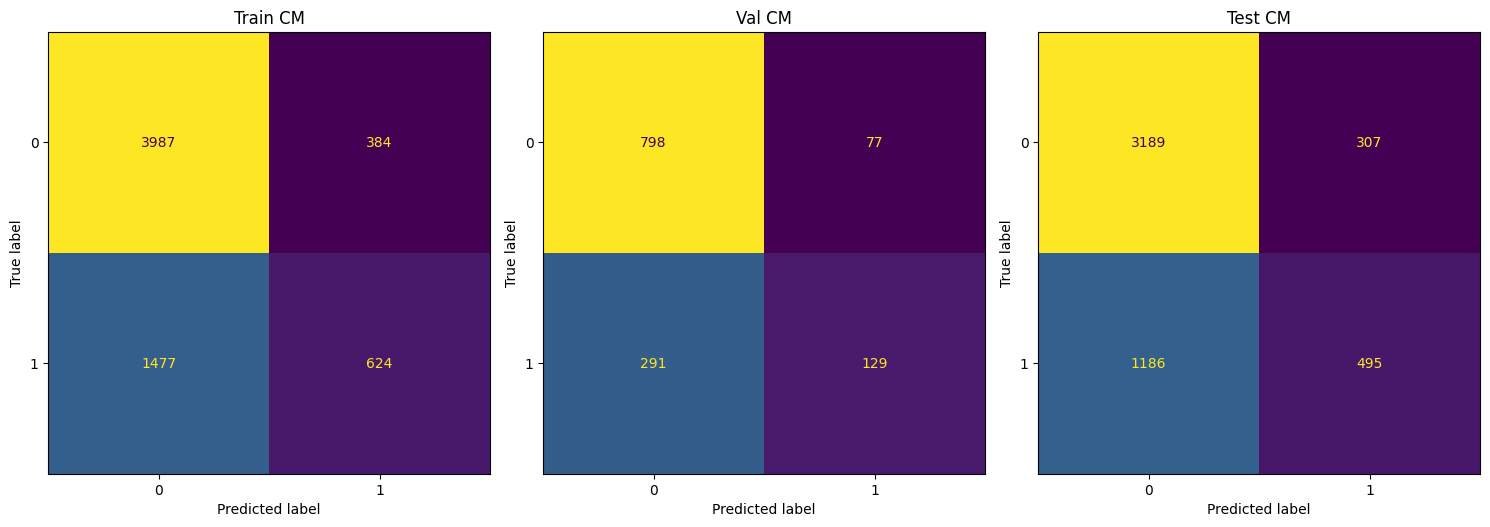

In [ ]:
# Crear figuras y ejes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Matriz de confusión para el conjunto de entrenamiento
cm_ridge_train = confusion_matrix(y_train, y_predict_ridge_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ridge_train)
disp.plot(ax=axes[0], colorbar=False)
axes[0].set_title('Train CM')

# Matriz de confusión para el conjunto de validación
cm_ridge_val = confusion_matrix(y_val, y_predict_ridge_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ridge_val)
disp.plot(ax=axes[1], colorbar=False)
axes[1].set_title('Val CM')

# Matriz de confusión para el conjunto de prueba
cm_ridge_test = confusion_matrix(y_test, y_predict_ridge_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ridge_test)
disp.plot(ax=axes[2], colorbar=False)
axes[2].set_title('Test CM')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

In [ ]:
with open("../models/ridge_model.pkl", "wb") as f:
    pickle.dump(ridge_random_search.best_estimator_, f)
print("Ridge CV Model saved")

Ridge CV Model saved


## Comparación de modelos

In [ ]:
# Create a data frame with the models perfomance measures scores
modelos_gridsearch = pd.DataFrame({'Base Model' : models_score['Base Model'],

    'PasiveAgresiveClassifier':[accuracy_score(y_train,y_predict_pac_train),
                            precision_score(y_train,y_predict_pac_train),
                            recall_score(y_train,y_predict_pac_train),
                            f1_score(y_train,y_predict_pac_train),
                            pac_fit_time],

    'Support Vector Classifier':[accuracy_score(y_train,y_predict_svc_train),
                            precision_score(y_train,y_predict_svc_train),
                            recall_score(y_train,y_predict_svc_train),
                            f1_score(y_train,y_predict_svc_train),
                            svc_fit_time],

    'Decision Tree':[accuracy_score(y_train,y_predict_dtr_train),
                            precision_score(y_train,y_predict_dtr_train),
                            recall_score(y_train,y_predict_dtr_train),
                            f1_score(y_train,y_predict_dtr_train),
                            dtr_fit_time],

    'Random Forest':[accuracy_score(y_train,y_predict_rfc_train),
                            precision_score(y_train,y_predict_rfc_train),
                            recall_score(y_train,y_predict_rfc_train),
                            f1_score(y_train,y_predict_rfc_train),
                            rfc_fit_time],

    'Gaussian Naive Bayes':[accuracy_score(y_train,y_predict_gnb_train),
                            precision_score(y_train,y_predict_gnb_train),
                            recall_score(y_train,y_predict_gnb_train),
                            f1_score(y_train,y_predict_gnb_train),
                            gnb_fit_time],

    'AdaBoost':[accuracy_score(y_train,y_predict_ada_train),
                            precision_score(y_train,y_predict_ada_train),
                            recall_score(y_train,y_predict_ada_train),
                            f1_score(y_train,y_predict_ada_train),
                            ada_fit_time],

    'RidgeCV':[accuracy_score(y_train,y_predict_ridge_train),
                            precision_score(y_train,y_predict_ridge_train),
                            recall_score(y_train,y_predict_ridge_train),
                            f1_score(y_train,y_predict_ridge_train),
                            ridge_fit_time],
    },

    index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Fit Time'])

#modelos_gridsearch['Best Score'] = modelos_gridsearch.iloc[:, 1:].idxmax(axis=1)

best_score = modelos_gridsearch.apply(lambda row: row.idxmin() if row.name == 'Fit Time' else row.idxmax(), axis=1)
modelos_gridsearch['Best Score'] = best_score

In [ ]:
print('Resultados de los modelos con Cross Validation')
models_score

Resultados de los modelos con Cross Validation


,Base Model,PasiveAgresiveClassifier,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,AdaBoost,RidgeCV,Best Score
Accuracy,0.811033,0.625153,0.709518,0.729606,0.805778,0.682477,0.715391,0.711835,Base Model
Precision,0.751370,0.413889,0.604728,0.582711,0.789030,0.511862,0.590797,0.619789,Random Forest
Recall,0.625393,0.455881,0.303666,0.587339,0.548292,0.484545,0.399802,0.291768,Base Model
F1 Score,0.682235,0.425317,0.403764,0.584955,0.646654,0.497272,0.475419,0.395989,Base Model
Fit Time,3.554347,0.018745,0.042594,0.370864,2.075885,0.014017,1.674572,0.023428,Gaussian Naive Bayes


In [ ]:
print('Resultados de los modelos con Grid Search Tunning')
modelos_gridsearch

Resultados de los modelos con Grid Search Tunning


,Base Model,PasiveAgresiveClassifier,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,AdaBoost,RidgeCV,Best Score
Accuracy,0.811033,0.655902,0.712454,0.881953,0.860167,0.707046,0.702256,0.712454,Decision Tree
Precision,0.751370,0.468020,0.612782,0.865101,0.741714,0.599226,0.740331,0.619048,Decision Tree
Recall,0.625393,0.438839,0.310328,0.753927,0.873394,0.294622,0.127558,0.297001,Random Forest
F1 Score,0.682235,0.452960,0.412006,0.805697,0.802186,0.395022,0.217621,0.401415,Decision Tree
Fit Time,3.554347,6.192973,31.885893,21.389004,334.426694,4.231185,250.269295,4.200669,Base Model


En un inicio el modelo base era mejor en la mayoría de las métricas, pero al aplicar el grid search encontramos que los mejores modelos son el Decision Tree y Random Forest.

##conclusiones
En este avance 4 se busca probar y comparar distintos modelos y tecnicas para identificar el de mejor desempeño para nuesto conjunto de datos, igualmente se pueda optener la configuración óptima que maximiza el rendimiento del modelo

Especificamente se probaron distintos modelos de clasificación, como los que son: Passive Aggressive Classifier, Linear SCV, Decision Tree, Random Forest, Gaussian Naïve Bayes, AdaBoost y Ridge CV Model.

Dentro de las metricas optenidas se muestran que la exactitud varía entre 0.62 y 0.88. La precisión, recall y F1-Score son diferentes para cada clase. Los valores mas bajos son del modelo de Naive y Passive Aggressive Classifier, los más altos son los modelos como Random Forest y Decision Tree. En cuanto al tiempo de ajuste, se observan diferencias notables en el tiempo de entrenamiento de cada modelo, como AdaBoost que lo haria mas costoso computacionalmente.

Finalmente en la comparacion de cross validation y Grid Search Tunning, estos ultimos muestran de igual manera que los mejores rsultados serian para Decision Tree y Random Forest.